`Objective:`
Predict whether a loan applicant is likely to default on a loan.

`Dataset:`
Loan Prediction Dataset (https://www.kaggle.com/datasets/ninzaami/loan-predication)

`Instructions:`
- Handle missing data appropriately.
- Visualize key features such as loan amount, education, and income.
- Train a classification model like Logistic Regression or Decision Tree.
- Evaluate the model using accuracy and a confusion matrix.

`Skills:`
- Data cleaning and handling missing values
- Exploratory Data Analysis (EDA)
- Binary classification using machine learning
- Model evaluation using confusion matrix and accuracy

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("loan_Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(30 * "=" + "shape" + 30 * "=")
print(df.shape)

print(30 * "=" + "info" + 30 * "=")
df.info()

print(30 * "=" + "Null Values" + 30 * "=")
df.isna().sum()

==============================shape==============================
(614, 13)
==============================info==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), obje

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 📌 Handling Missing Values

Our dataset contains **614 rows** and **13 columns**.  
Some columns have missing values, which we need to handle before modeling.

### Missing Value Summary
| Column             | Missing Count | Data Type |
|--------------------|--------------:|-----------|
| Gender             | 13            | object    |
| Married            | 3             | object    |
| Dependents         | 15            | object    |
| Self_Employed      | 32            | object    |
| LoanAmount         | 22            | float64   |
| Loan_Amount_Term   | 14            | float64   |
| Credit_History     | 50            | float64   |

### Plan for Handling Missing Data
1. **Categorical Columns (`Gender`, `Married`, `Dependents`, `Self_Employed`)**  
   - Fill missing values with the **mode** (most frequent value).

2. **Numerical Columns (`LoanAmount`, `Loan_Amount_Term`)**  
   - Fill missing values with the **median** to reduce the effect of outliers. (will have to check distributions for mean imputation)

3. **Credit_History**  
   - Fill missing values with the **mode** because it is a binary feature (0 or 1).

In [4]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [5]:
# Handling missing values

# 1. Categorical columns → fill with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Numerical columns → fill with median
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# confirm no missing values
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


---
# Exploratory Data Analysis

## Univariate Analysis

### Histogram

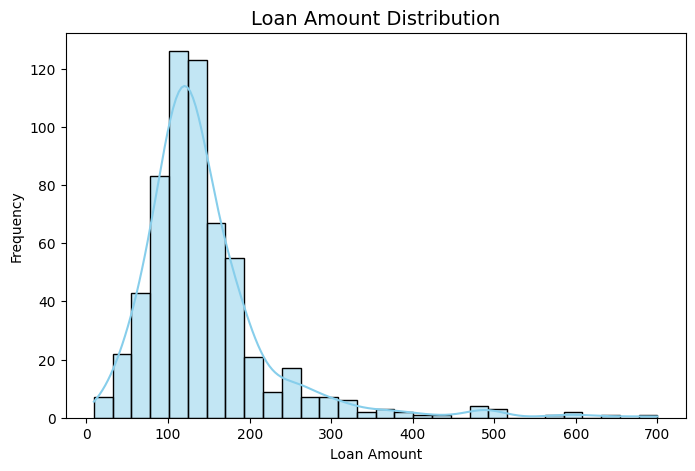

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='skyblue')
plt.title("Loan Amount Distribution", fontsize=14)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

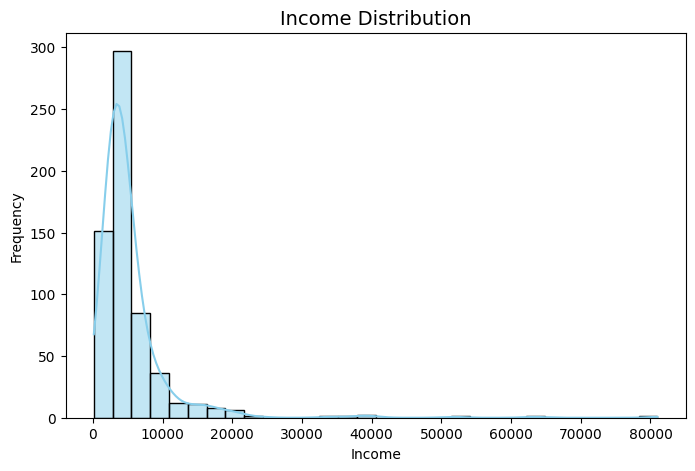

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True, color='skyblue')
plt.title("Income Distribution", fontsize=14)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

### Pie Chart

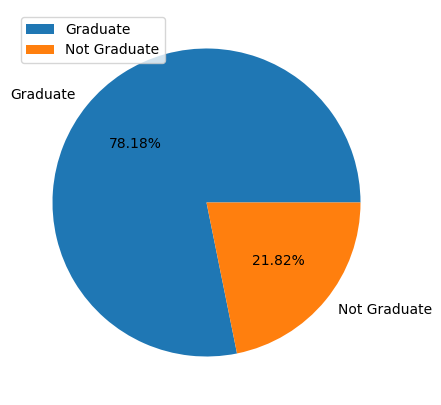

In [8]:
plt.figure(figsize=(8, 5))
plt.pie(x=df['Education'].value_counts(), labels=df['Education'].unique(), autopct="%.2f%%")
plt.legend()
plt.show()

## Bi-Variate Analysis

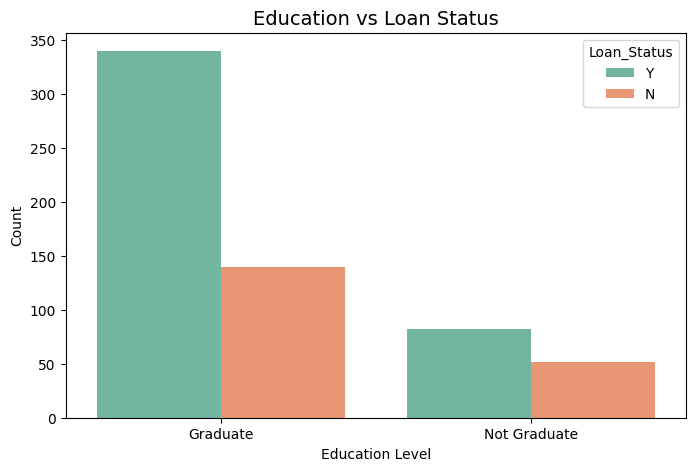

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='Set2')
plt.title("Education vs Loan Status", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

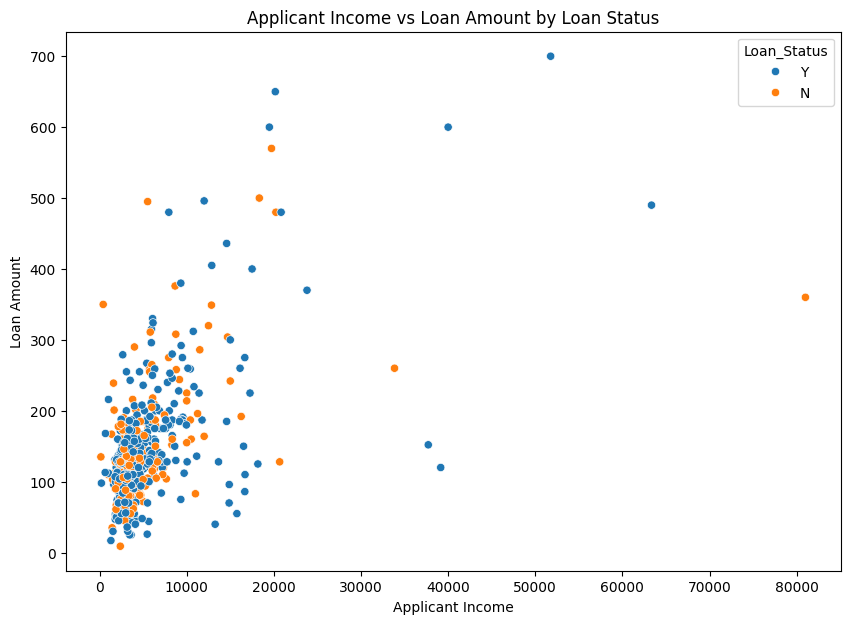

In [10]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title("Applicant Income vs Loan Amount by Loan Status")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

---
# Machine Learning

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [12]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Logistic Regression

C:\Users\sdnr1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7886178861788617


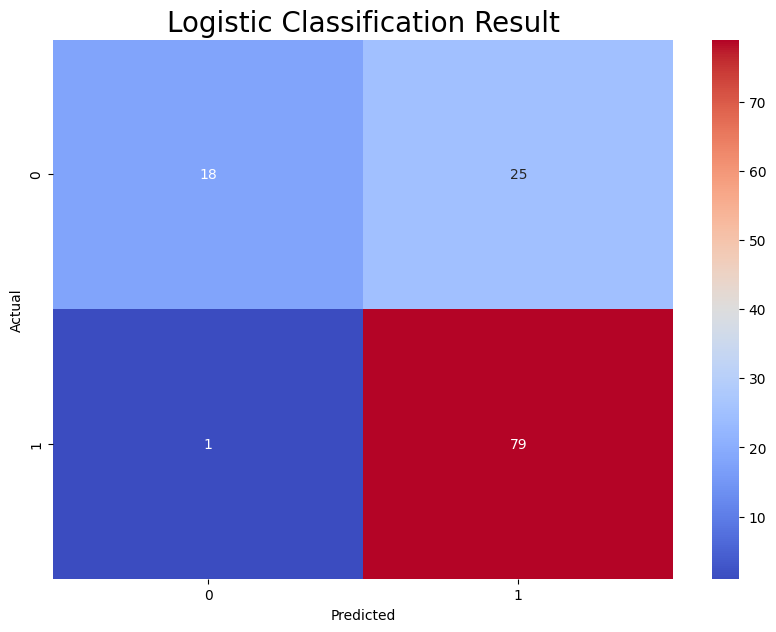

In [13]:
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", acc_lr)

plt.figure(figsize=(10, 7))
sns.heatmap(data=cm_lr, cmap="coolwarm", annot=True, fmt="d")
plt.title("Logistic Classification Result", fontsize=20)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree

Decision Tree Accuracy: 0.7723577235772358


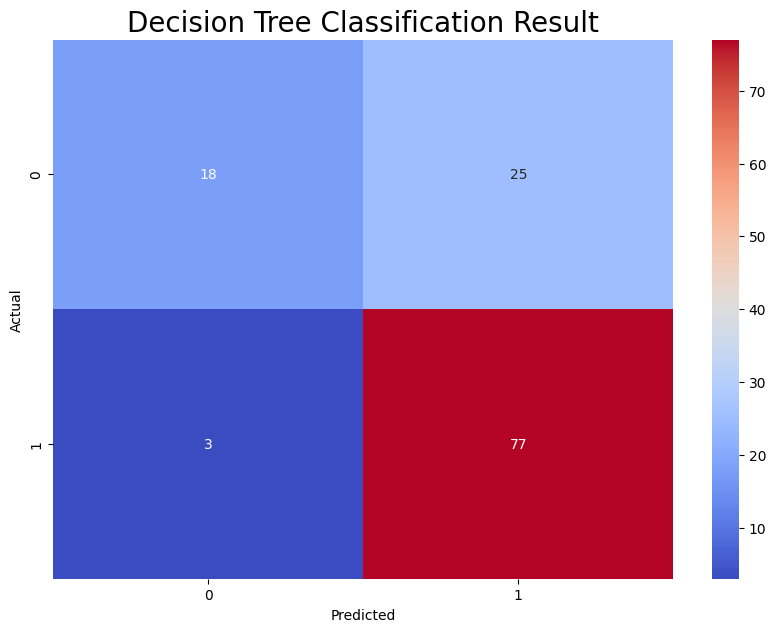

In [17]:
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", acc_dt)

plt.figure(figsize=(10, 7))
sns.heatmap(data=cm_dt, cmap="coolwarm", annot=True, fmt="d")
plt.title("Decision Tree Classification Result", fontsize=20)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Further Model Analysis

## Classification Reports

In [18]:
print("'Logistic Regression' Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n'Decision Tree' Classification Report:\n", classification_report(y_test, y_pred_dt))

'Logistic Regression' Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


'Decision Tree' Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



## ROC Curve & AUC Score

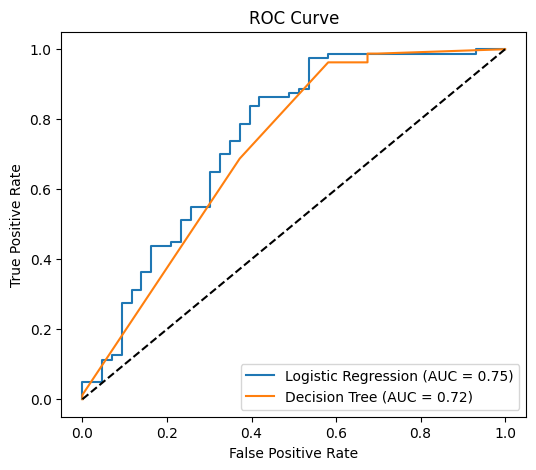

In [16]:
# Logistic Regression
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Decision Tree
y_prob_dt = dt_clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

---
---
# Model Evaluation Insights

We trained and evaluated two classification models for Credit Risk Prediction:

1. **Logistic Regression**
2. **Decision Tree Classifier**

`Note:` Here Class 0 --> N and Class 1 --> Y
---

### **1️⃣ Logistic Regression**
- **Accuracy:** 78.86%
- **Confusion Matrix:**
    [[18, 25],
    [ 1, 79]]

- **True Negatives (TN):** 18
- **False Positives (FP):** 25
- **False Negatives (FN):** 1
- **True Positives (TP):** 79
- **Precision (Class 0 / No Default):** 0.95 → very high, but recall is low (0.42), meaning it misses many "No Default" cases.
- **Precision (Class 1 / Default):** 0.76 → decent balance with high recall (0.99).
- **AUC Score:** 0.75 → Good separation between classes.

**Interpretation:** Logistic Regression is very good at identifying defaulters (high recall for Class 1), but struggles with predicting non-defaulters (low recall for Class 0).

---

### **2️⃣ Decision Tree**
- **Accuracy:** 77.23%
- **Confusion Matrix:**
    [[18, 25],
    [ 3, 77]]  
                                                                                                                                                        
- **True Negatives (TN):** 18
- **False Positives (FP):** 25
- **False Negatives (FN):** 3
- **True Positives (TP):** 77
- **Precision (Class 0 / No Default):** 0.86 → lower than Logistic Regression, but recall is similar (0.42).
- **Precision (Class 1 / Default):** 0.75 → high recall (0.96).
- **AUC Score:** 0.72 → slightly lower than Logistic Regression.

**Interpretation:** Decision Tree also predicts defaulters well, but offers slightly less overall performance compared to Logistic Regression in terms of AUC and accuracy.

---

### Overall Insights
- Both models are **biased towards predicting defaulters** due to the higher recall for Class 1.
- **Logistic Regression** achieves slightly better accuracy and AUC compared to Decision Tree.